In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install dipy

     |████████████████████████████████| 7.7MB 5.0MB/s 


In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn
import dipy
import h5py
from mpl_toolkits.mplot3d import Axes3D

# Load data

In [ ]:
fdwi1 = "/content/drive/My Drive/Connectom_bis/Datab1000_session1.nii"
fbval1 = "/content/drive/My Drive/Connectom_bis/Bval_session1.bval"
fbvec1 = "/content/drive/My Drive/Connectom_bis/Bvec_session1.bvec"

fdwi2 = "/content/drive/My Drive/Connectom_bis/Datab1000_session2.nii"
fbval2 = "/content/drive/My Drive/Connectom_bis/Bval_session2.bval"
fbvec2 = "/content/drive/My Drive/Connectom_bis/Bvec_session2.bvec"

fdwi3 = "/content/drive/My Drive/Connectom_bis/Datab1000_session3.nii"
fbval3 = "/content/drive/My Drive/Connectom_bis/Bval_session3.bval"
fbvec3 = "/content/drive/My Drive/Connectom_bis/Bvec_session3.bvec"

In [ ]:
from dipy.io import read_bvals_bvecs
bvals1, bvecs1 = read_bvals_bvecs(fbval1, fbvec1)
bvals2, bvecs2 = read_bvals_bvecs(fbval2, fbvec2)
bvals3, bvecs3 = read_bvals_bvecs(fbval3, fbvec3)

In [ ]:
bvals = np.concatenate([bvals1, bvals2, bvals3])
bvecs = np.concatenate([bvecs1, bvecs2, bvecs3])

In [ ]:
bvecs.shape

(936, 3)

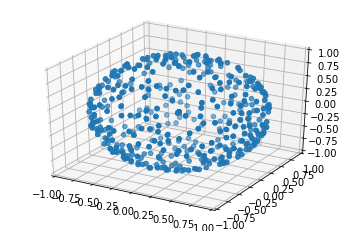

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bvecs[:, 0], bvecs[:, 1], bvecs[:, 2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

In [ ]:
import nibabel as nib
img1 = nib.load(fdwi1)
img2 = nib.load(fdwi2)
img3 = nib.load(fdwi3)

# Create and visualize 90 clusters - approximately 10 points/cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=90, random_state=0).fit(bvecs)

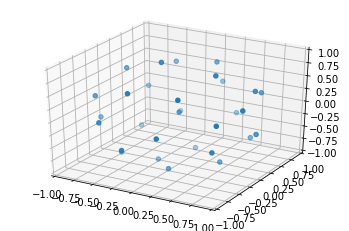

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

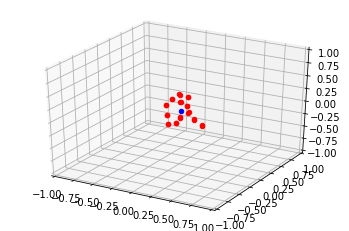

In [ ]:
cluster = 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], kmeans.cluster_centers_[cluster, 2], c="blue")
preds = kmeans.predict(bvecs)
for i in range(len(bvecs)):
  if preds[i]==cluster:
    ax.scatter(bvecs[i, 0], bvecs[i, 1], bvecs[i, 2], c="red")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

# Create and visualize 30 clusters - approximately 31 points/cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=0).fit(bvecs)

# Create list of images for each cluster

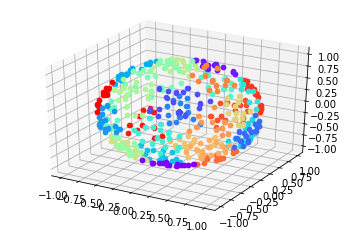

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
preds = kmeans.predict(bvecs)
colors = cm.rainbow(np.linspace(0, 1, 30))
for i in range(len(bvecs)):
    ax.scatter(bvecs[i, 0], bvecs[i, 1], bvecs[i, 2], color=colors[preds[i]])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

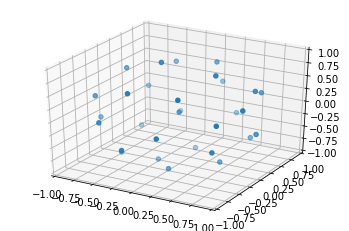

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

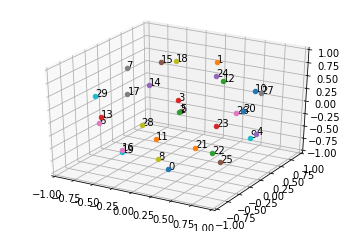

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(kmeans.cluster_centers_)):
  x, y, z = kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 2]
  ax.scatter(x, y, z)
  ax.text(x, y, z, i)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

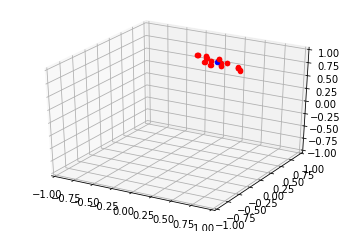

In [ ]:
cluster = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], kmeans.cluster_centers_[cluster, 2], c="blue")
preds = kmeans.predict(bvecs)
for i in range(len(bvecs)):
  if preds[i]==cluster:
    ax.scatter(bvecs[i, 0], bvecs[i, 1], bvecs[i, 2], c="red")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

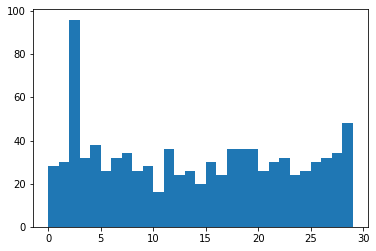

In [ ]:
clusters = kmeans.predict(bvecs)
plt.hist(clusters, bins=np.arange(30))
plt.show()

In [ ]:
images_cluster = []
for cluster in range(30):
  l = []
  for i in range(len(clusters)):
    if clusters[i]==cluster:
      l.append(i)
  images_cluster.append(l)

# Create and visualize 10 clusters - approximately 310 points/cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(bvecs)

# Create list of images for each cluster

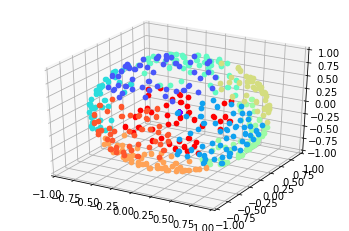

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
preds = kmeans.predict(bvecs)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(len(bvecs)):
    ax.scatter(bvecs[i, 0], bvecs[i, 1], bvecs[i, 2], color=colors[preds[i]])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

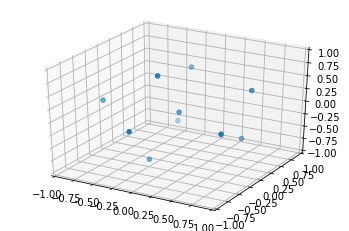

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

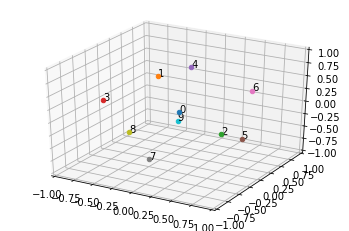

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(kmeans.cluster_centers_)):
  x, y, z = kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 2]
  ax.scatter(x, y, z)
  ax.text(x, y, z, i)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

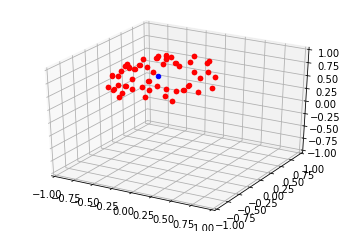

In [ ]:
cluster = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], kmeans.cluster_centers_[cluster, 2], c="blue")
preds = kmeans.predict(bvecs)
for i in range(len(bvecs)):
  if preds[i]==cluster:
    ax.scatter(bvecs[i, 0], bvecs[i, 1], bvecs[i, 2], c="red")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

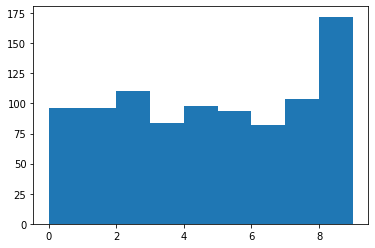

In [ ]:
clusters = kmeans.predict(bvecs)
plt.hist(clusters, bins=np.arange(10))
plt.show()

In [ ]:
images_cluster = []
for cluster in range(10):
  l = []
  for i in range(len(clusters)):
    if clusters[i]==cluster:
      l.append(i)
  images_cluster.append(l)

# Calculate most central point for each cluster

In [ ]:
centrals = []
for cluster in range(10):
  centroid = kmeans.cluster_centers_[cluster]
  points = np.array([bvecs[j] for j in images_cluster[cluster]])
  distances = np.linalg.norm(points-centroid)
  amin = distances.argmin()
  centrals.append(images_cluster[cluster][amin])

# Create dataset with central vectors

In [ ]:
central_images = np.zeros((292, 288, 192, 10))
for cluster in range(10):
  print(cluster)
  i = centrals[cluster]
  if i < 312:
    central_images[:,:,:,cluster] = img1.dataobj[:,:,:,i]
  elif i<2*312:
    central_images[:,:,:,cluster] = img2.dataobj[:,:,:,i-312]
  else:
    central_images[:,:,:,cluster] = img3.dataobj[:,:,:,i-2*312]

0
1
2
3
4
5
6
7
8
9


In [ ]:
hf = h5py.File('/content/drive/My Drive/Connectom_bis/central_images.h5', 'w')
hf.create_dataset('dataset_1', data=central_images)
hf.close()

In [ ]:
del central_images

# Calculate mean for each cluster

In [ ]:
averages = np.zeros((292, 288, 192, 10))
for cluster in range(10):
  print(cluster)
  for i in images_cluster[cluster]:
    if i!=centrals[cluster]:
      if i < 312:
        averages[:,:,:,cluster] += img1.dataobj[:,:,:,i]
      elif i<2*312:
        averages[:,:,:,cluster] += img2.dataobj[:,:,:,i-312]
      else:
        averages[:,:,:,cluster] += img3.dataobj[:,:,:,i-2*312]
    averages[:,:,:,cluster] /= len(images_cluster[cluster])-1

0
1
2
3
4
5
6
7
8
9


In [ ]:
hf = h5py.File('/content/drive/My Drive/Connectom_bis/averages.h5', 'w')
hf.create_dataset('dataset_1', data=averages)
hf.close()

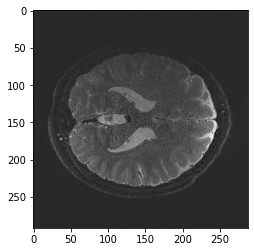

In [ ]:
plt.imshow(averages[:,:, 100, 0], cmap="gray")

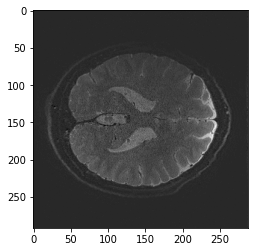

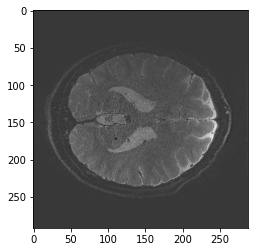

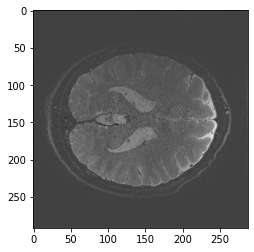

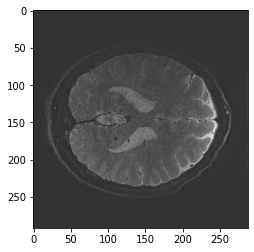

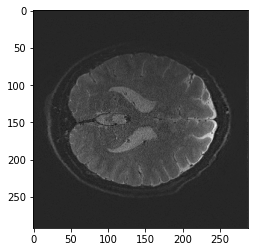

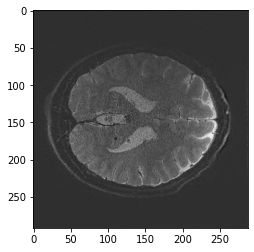

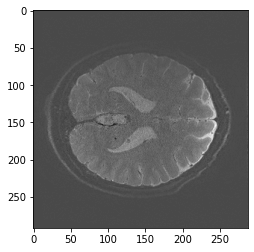

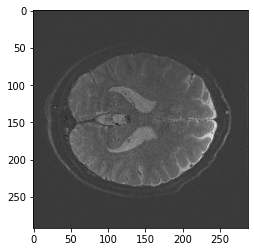

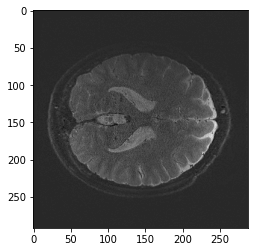

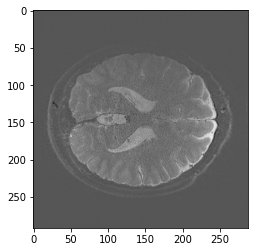

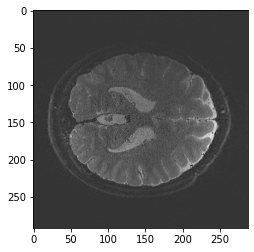

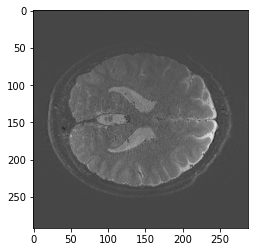

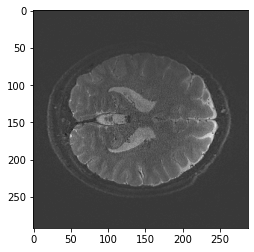

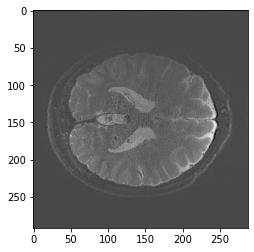

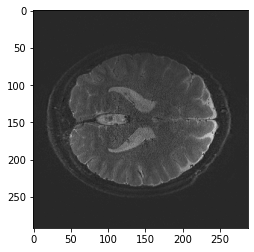

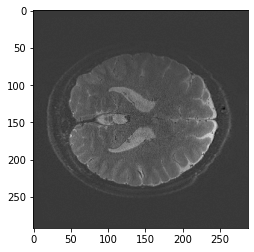

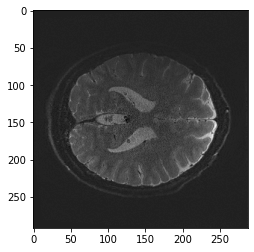

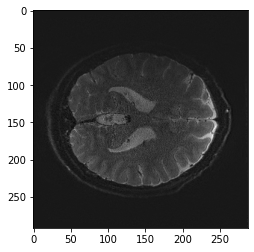

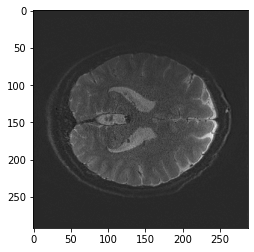

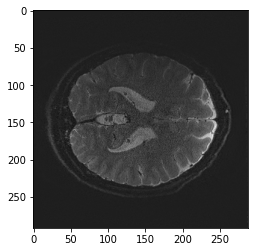

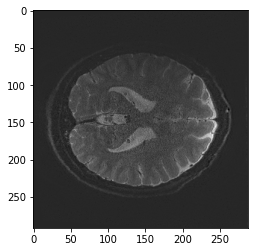

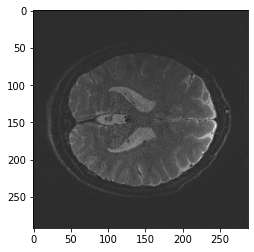

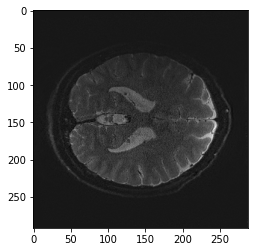

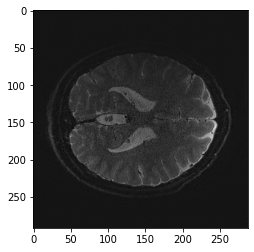

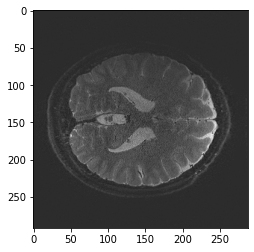

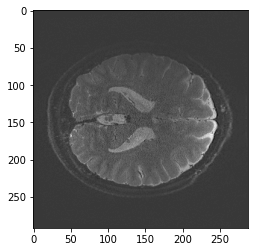

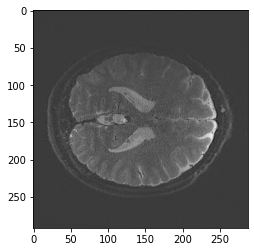

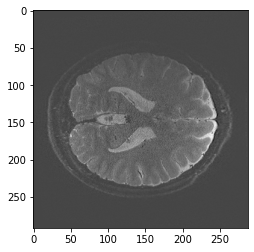

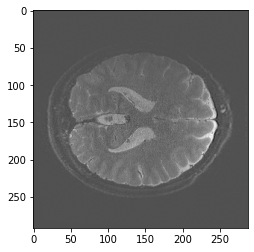

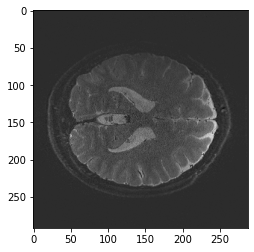

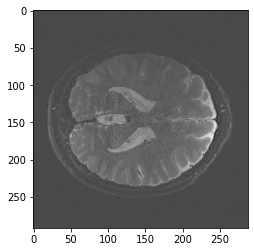

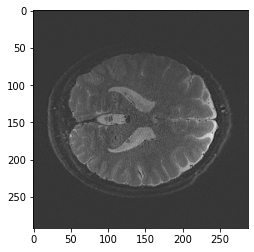

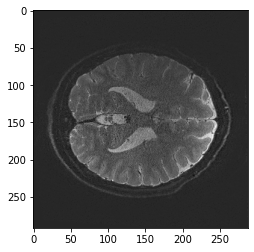

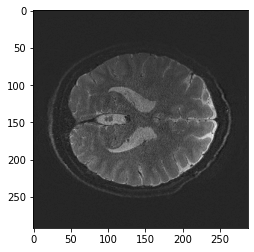

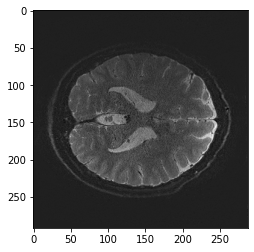

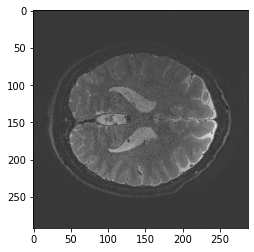

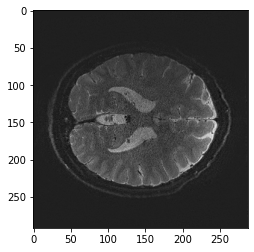

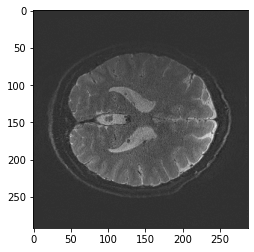

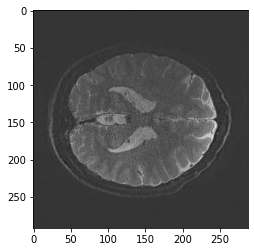

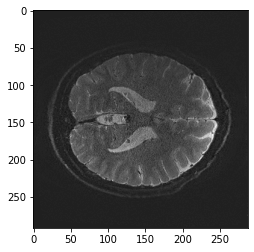

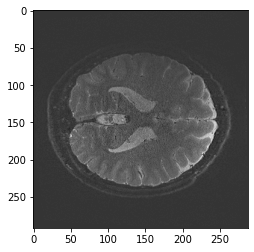

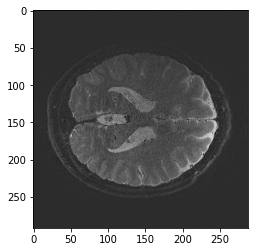

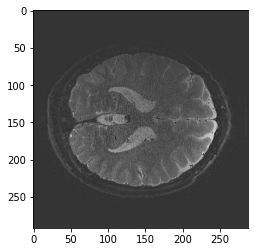

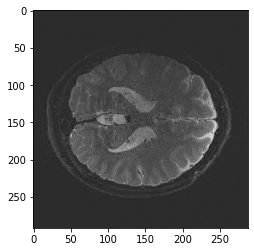

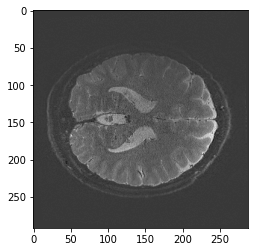

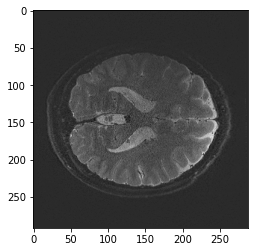

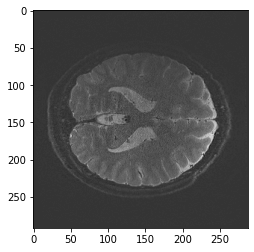

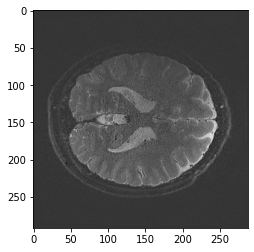

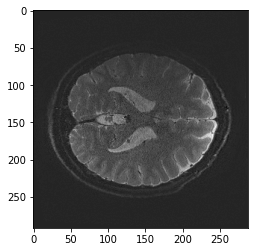

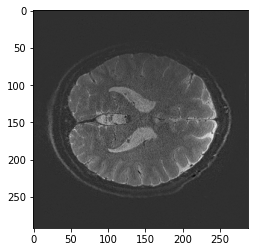

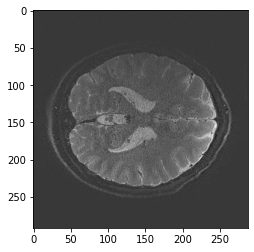

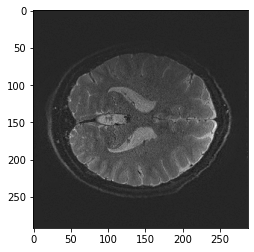

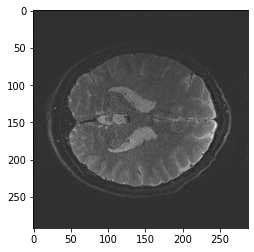

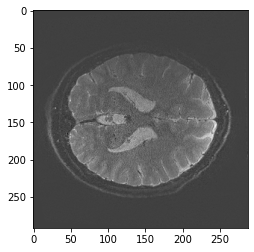

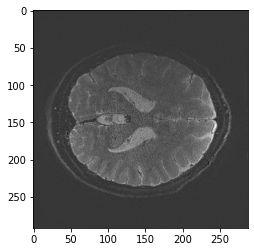

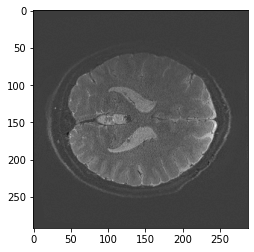

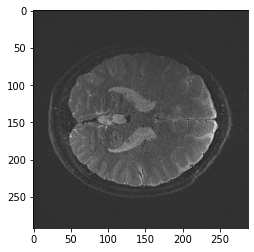

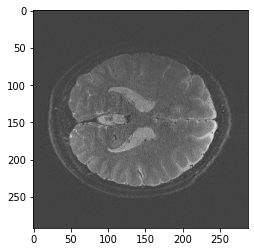

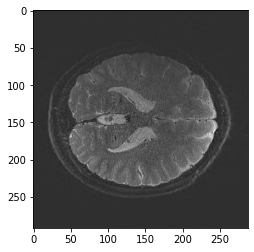

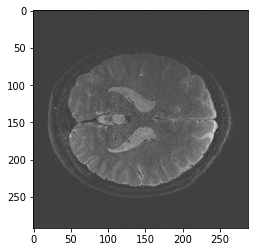

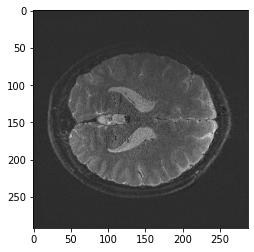

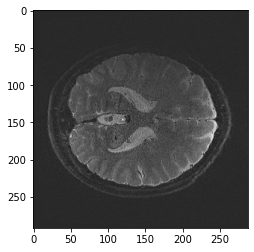

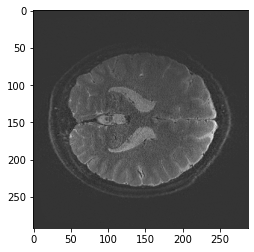

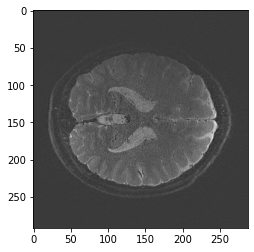

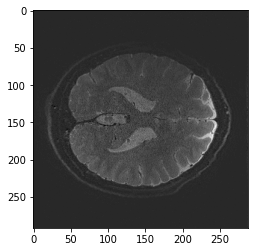

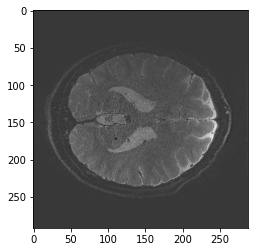

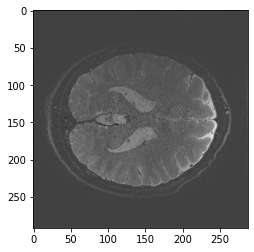

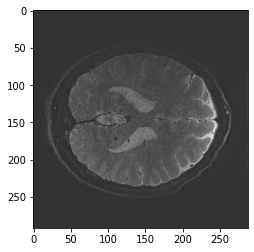

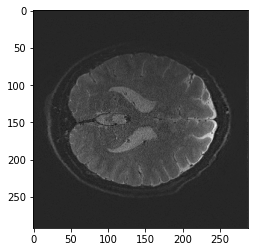

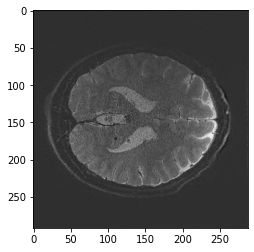

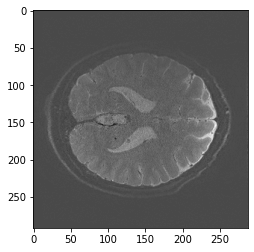

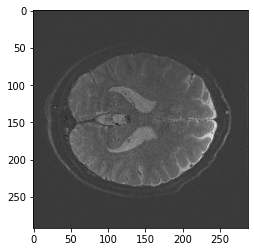

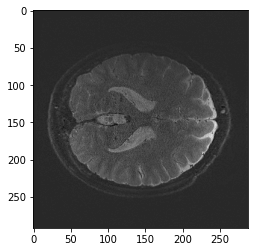

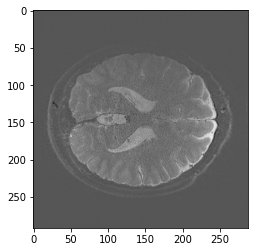

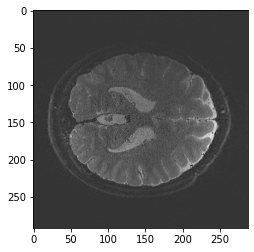

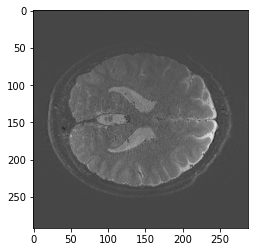

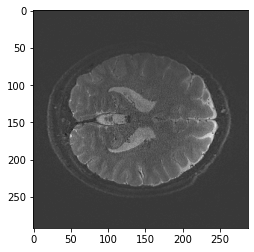

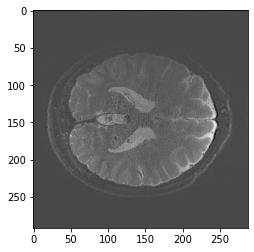

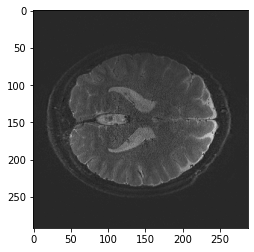

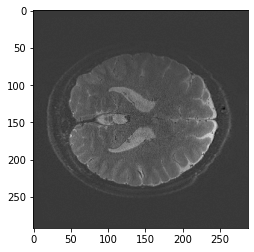

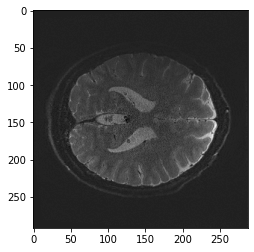

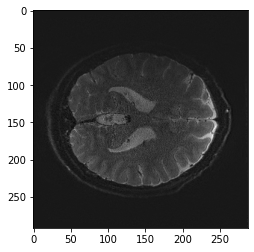

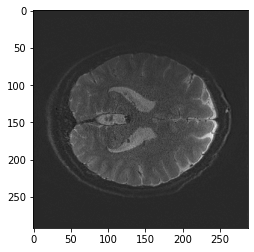

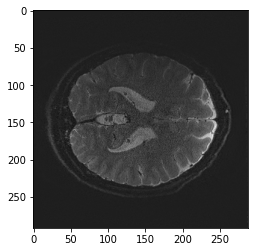

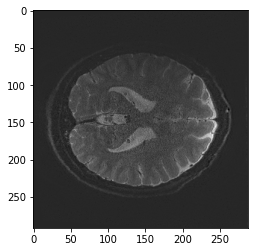

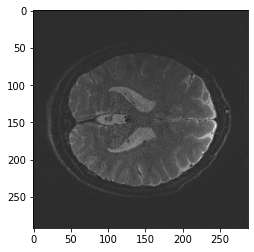

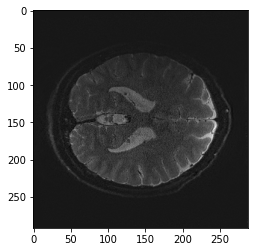

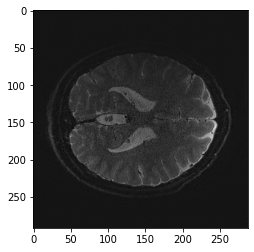

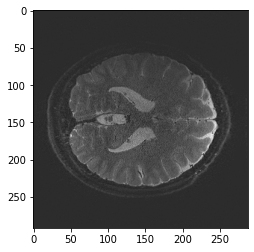

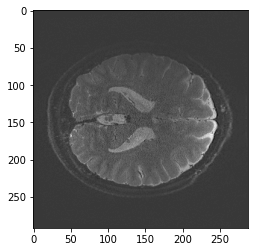

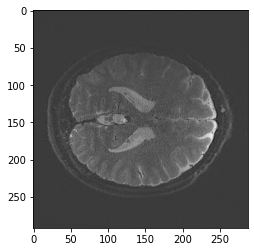

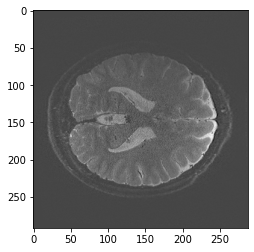

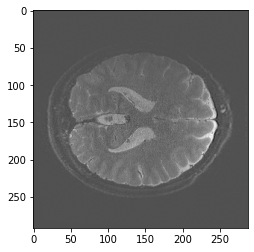

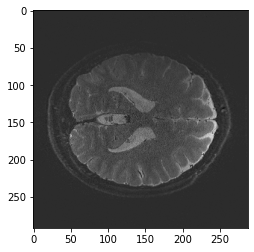

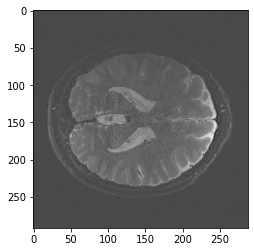

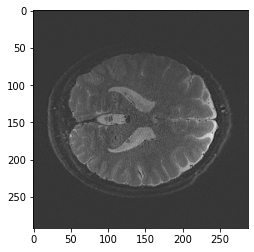

In [ ]:
for i in images_cluster[0]:
    if i < 312:
      plt.imshow(img1.dataobj[:,:,100,i], cmap="gray")
    elif i<2*312:
      plt.imshow(img2.dataobj[:,:,100,i-312], cmap="gray")
    else:
      plt.imshow(img1.dataobj[:,:,100,i-2*312], cmap="gray")
    plt.show()